<a href="https://colab.research.google.com/github/kandelprakashchandra/vis/blob/main/PS1_DataVisualization_Prakash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PS_1**

**Prakash Kandel**

**Course:** 56:834:653:01 DATA VISUALIZATION

Spring 2023

**Instructor**: Adam Okulicz-Kozaryn

In [346]:
from statistics import *
import pylab as plt
import pandas as pd
import pandas_datareader as pdr
import datetime
from pandas_datareader import wb
import sys
import os 
import re
import urllib  #weird, guess need to have os and pandas imported for this to work                                                  
import string #for annotating pouints in scatter                                                                           
import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                                                                                                            
from geopy.geocoders import Nominatim
import json
import numpy
import openpyxl
from pathlib import Path


Data Source:
<a href="https://hdr.undp.org/content/2022-global-multidimensional-poverty-index-mpi#/indicies/MPI"> 2022 Global Multidimensional Poverty Index (MPI)</a>

The dataset is about measurement of multidimensional poverty based on health, education, and standard of living in countries around the world. 

**What Is The Multidimensional Poverty Measure?**

An index that captures the percentage of households in a country deprived along three dimensions of well-being – monetary poverty, education, and basic infrastructure services – to provide a more complete picture of poverty. A means to capture the complexity of poverty that considers multiple dimensions of well-being beyond just monetary poverty.

(Source: Multidimensional Poverty Measure, World Bank)

In [ ]:
dir(sys)

In [ ]:
# Multi Dimensional Poverty Database 2022
urllib.request.urlretrieve("https://docs.google.com/uc?id=1rA6uE63JeuNfC5CVsoSWF2qFtiPfrO5z&export=download", "2022_Multi_Dimensional_Poverty_ Dataset.xlsx")

df.head()


In [ ]:
df = pd.read_excel('/content/2022_Multi_Dimensional_Poverty_ Dataset.xlsx', 
                   sheet_name='Table 1',
                   header=3, 
                   usecols='A,C,E,G,I,K,M,O,Q,S,U,W,Y,AA,AC') # using only columns that have meaningful data
df.head()

In [ ]:
df= df.drop(labels=1, axis=0) #dropped the 'Observation 1' as it did not contaon relevant data 

df.head()


In [ ]:
df.tail(50) #observing the last 50 rows in order to see which rows are not required as part of the cleaning

In [ ]:
df.drop(df.index[113:161], inplace=True) # dropped rows that did not contain data but notes
 
df.tail() # to ensure the lowest portion contains the nam eof countries only

In [367]:
list(df) # list of variables for renaming purpose

['Unnamed: 0',
 'Year and survey',
 'Unnamed: 4',
 'Headcount',
 'Intensity of deprivation',
 'Number of poor (year of the survey)',
 'Number of poor (2020)',
 'Inequality among the poor',
 'Population in severe multidimensional poverty ',
 'Unnamed: 18',
 'Health',
 'Education',
 'Standard of living',
 'National poverty line',
 'PPP $1.90 a day']

In [371]:
# renaming the columns

df.rename(columns = {'Unnamed: 0':'country', 
                     'Year and survey': 'Year and survey (2010-21)',
                     'Unnamed: 4' : 'Value of MPI', 
                     'Headcount': 'Headcount (%)',
                     'Intensity of deprivation' : 'Intensity of deprivation (%)', 
                     'Number of poor (year of the survey)' : 'Number of poor in 000s(year of the survey)',
                     'Number of poor (2020)' : 'Number of poor in 000s (2020)',
                     'Inequality among the poor' : 'Inequality among the poor (%)',
                     'Population in severe multidimensional poverty': 'Population in severe multidimensional poverty(%)',
                     'Unnamed: 18': 'Population vulnerable to multidimensional poverty (%)',
                     'Health':'Contribution of Health in MPI (%)',
                     'Education': 'Contribution of Education in MPI (%)',
                     'Standard of living': 'Contribution of Standard of Living in MPI (%)',
                     'National poverty line': 'National poverty line(2009-2021)',
                     'PPP $1.90 a day': 'PPP $1.90 a day (2009-2021)'}, inplace = True)

# Here 'MPI' referes to Multidimensional Poverty Index'.


In [ ]:
df = df.drop(labels=0, axis=0) # removed the 'Observation Row 0" as it did not have meaningful data
df

,country,Year and survey (2010-21),Value of MPI,Headcount (%),Intensity of deprivation (%),Number of poor in 000s(year of the survey),Number of poor in 000s (2020),Inequality among the poor (%),Population in severe multidimensional poverty,Population vulnerable to multidimensional poverty (%),Contribution of Health in MPI (%),Contribution of Education in MPI (%),Contribution of Standard of Living in MPI (%),National poverty line(2009-2021),PPP $1.90 a day (2009-2021)
2,Afghanistan,2015/2016 D,0.271721,55.910242,48.59955,19365.187015,21789.46795,0.020276,24.861951,18.137625,10.009383,44.988769,45.001850,54.5,..
3,Albania,2017/2018 D,0.002748,0.703561,39.056706,20.24155,20.17004,..,0.067062,5.04032,28.259981,55.054617,16.685401,21.8,0.0
4,Algeria,2018/2019 M,0.005409,1.380835,39.17263,589.690668,599.995812,0.006748,0.202808,3.607168,31.214354,49.301260,19.484380,5.5,0.4
5,Angola,2015/2016 D,0.282435,51.10411,55.266601,14899.273606,17083.330417,0.023988,32.457551,15.542856,21.164586,32.050019,46.785396,32.3,49.9
6,Argentina,2019/2020 M,0.001469,0.432323,33.98602,194.70126,194.70126,..,0.005121,1.647459,69.67954,21.381985,8.938479,42.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,South Sudan,2010 M,0.580157,91.862887,63.154715,8923.945762,9743.186339,0.023142,74.343175,6.336535,13.987631,39.562219,46.450150,82.3,76.5
110,Sudan,2014 M,0.27944,52.328044,53.4015,19363.074392,23254.837148,0.02348,30.878279,17.660528,21.060756,29.151100,49.788141,46.5,12.2
111,Trinidad and Tobago,2011 M,0.002418,0.636561,37.984198,9.039289,9.663927,..,0.099323,3.681444,45.490643,34.025756,20.483601,..,..
112,Ukraine,2012 M,0.00084,0.244237,34.410454,110.898957,107.243799,..,0.0,0.418627,60.483237,28.359218,11.157545,1.1,0.0


In [387]:
df['country'].describe() #Descriptive Statistics for the country variable

count         113
unique        113
top       Country
freq            1
Name: country, dtype: object

In [388]:
df['Headcount (%)'].describe() #Descriptive Statistics for the Headcount Ration

count     112
unique    112
top       (%)
freq        1
Name: Headcount (%), dtype: object

In [389]:
df['Contribution of Standard of Living in MPI (%)'].describe() ##Descriptive Statistics for the "Contribution of Standard of Living in MPI (%)" variable

count    111.000000
mean      37.471669
std       16.192236
min        1.058382
25%       26.333341
50%       41.112393
75%       49.818836
max       65.336499
Name: Contribution of Standard of Living in MPI (%), dtype: float64

On average "Standard of Living" contibuted to 37% deprivation to overall multidimensional poverty across the selected countries.

In [390]:
df['Contribution of Education in MPI (%)'].describe() ##Descriptive Statistics for the "Contribution of Education in MPI (%)" variable

#Contribution of Education in MPI (%)

count    111.000000
mean      31.383064
std       11.881821
min        0.660957
25%       23.456622
50%       31.491717
75%       39.614716
max       61.568220
Name: Contribution of Education in MPI (%), dtype: float64

On average "Education" contibuted to 31% deprivation to overall multidimensional poverty across the selected countries.

In [392]:
df['Contribution of Education in MPI (%)'].quantile(q=0.50)

31.491717

The median value for 'Contribution of Education in MPI (%)' is 31.5% .

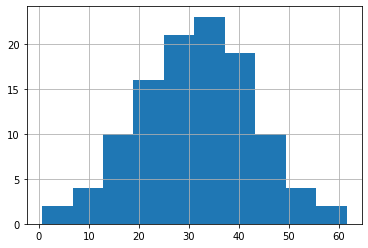

In [397]:
df["Contribution of Education in MPI (%)"].hist()  

The highest contribution od education in multidimensional deprivation is between 30% to 40% among the countries around the world.